In [1]:
#set up pandas environment
import pandas as pd

In [2]:
#load sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
import matplotlib.dates as mdates

In [4]:
def showtable(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
    display(df)

In [5]:
showtable('mytweets_11301201.csv')

,number,text,date,fav
0,1,joke worked primark manager yell taking many t...,2021-11-30 23:59:52+00:00,0
1,2,yeah boss tried get work today day off maybe t...,2021-11-30 23:59:52+00:00,6
2,3,manager wants play guitar next meeting nsjdndl...,2021-11-30 23:59:36+00:00,6
3,4,told boss i’m refer job title hells fav secretary,2021-11-30 23:59:24+00:00,0
4,5,bookie added boss man sum gotta change,2021-11-30 23:59:20+00:00,0
...,...,...,...,...
6598,6599,manager told coworker tested positive covid 😭😭,2021-11-30 00:01:10+00:00,0
6599,6600,know sweetie boss burned paycheque 😔,2021-11-30 00:00:44+00:00,1
6600,6601,pretty sure boss tell new colleague colleague ...,2021-11-30 00:00:23+00:00,2
6601,6602,boss stood right front actual iphone headphone...,2021-11-30 00:00:19+00:00,0


In [7]:
#Count how many tweets in each file
def shownum(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
#set up timestamp
    df.date = df.date.map(pd.Timestamp)
#calc scores
    scores = pd.DataFrame(list(df.text.apply(lambda t: {**analyzer.polarity_scores(t), 'text': t})))
#finalize df_final and check it
    df_final = pd.merge(df, scores, on='text')
#display 
    df['number'] = 1
    print(df['number'])
    df.resample('60min', on='date').sum().reset_index().plot.scatter(x='date', y='number')

In [8]:
import numpy as np

In [9]:
#show the pattern of negative score
def showreg(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
#set up timestamp
    df.date = df.date.map(pd.Timestamp)
#calc scores
    scores = pd.DataFrame(list(df.text.apply(lambda t: {**analyzer.polarity_scores(t), 'text': t})))
    scores['date'] = df['date']
    scores['number'] = 1
    scoresum = scores.resample('60min', on='date').sum()
    scoresum['neg_mean'] = scoresum['neg'] / scoresum['number']
    scoresum['neg_mean_day'] = scoresum['neg_mean'].mean()
    plot = scoresum.plot.line(y =['neg_mean', 'neg_mean_day'])
    plot.set_yticks(np.arange(0.05, 0.18,0.01))

In [12]:
#show the pattern of positive score
def showreg1(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
#set up timestamp
    df.date = df.date.map(pd.Timestamp)
#calc scores
    scores = pd.DataFrame(list(df.text.apply(lambda t: {**analyzer.polarity_scores(t), 'text': t})))
    scores['date'] = df['date']
    scores['number'] = 1
    scoresum = scores.resample('60min', on='date').sum()
    scoresum['pos_mean'] = scoresum['pos'] / scoresum['number']
    scoresum['pos_mean_day'] = scoresum['pos_mean'].mean()
    plot = scoresum.plot.line(y =['pos_mean', 'pos_mean_day'])
    plot.set_yticks(np.arange(0.12, 0.25,0.01))

In [13]:
#show the pattern of neutral score
def showreg2(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
#set up timestamp
    df.date = df.date.map(pd.Timestamp)
#calc scores
    scores = pd.DataFrame(list(df.text.apply(lambda t: {**analyzer.polarity_scores(t), 'text': t})))
    scores['date'] = df['date']
    scores['number'] = 1
    scoresum = scores.resample('60min', on='date').sum()
    scoresum['neu_mean'] = scoresum['neu'] / scoresum['number']
    scoresum['neu_mean_day'] = scoresum['neu_mean'].mean()
    plot = scoresum.plot.line(y =['neu_mean', 'neu_mean_day'])
    plot.set_yticks(np.arange(0.68, 0.81,0.01))

In [14]:
#show descriptive stat
def showstat(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
#set up timestamp
    df.date = df.date.map(pd.Timestamp)
#calc scores
    scores = pd.DataFrame(list(df.text.apply(lambda t: {**analyzer.polarity_scores(t), 'text': t})))
    scores['date'] = df['date']
    scores['tweetnumber'] = 1
    scoresum = scores.resample('60min', on='date').sum()
    scoresum['pos_mean'] = scoresum['pos'] / scoresum['tweetnumber']
    scoresum['neg_mean'] = scoresum['neg'] / scoresum['tweetnumber']
    scoresum['neu_mean'] = scoresum['neu'] / scoresum['tweetnumber']
    stat = scoresum[['pos_mean','neg_mean', 'neu_mean']].describe()
    stattable = pd.DataFrame(stat)
    display(stattable)

In [15]:
def showstat1(filename):
#load my dataset
    df = pd.read_csv(filename)
#drop empty columns
    df.dropna(inplace=True)
#set up timestamp
    df.date = df.date.map(pd.Timestamp)
#calc scores
    scores = pd.DataFrame(list(df.text.apply(lambda t: {**analyzer.polarity_scores(t), 'text': t})))
    scores['date'] = df['date']
    stat = scores.describe()
    stattable = pd.DataFrame(stat)
    display(stattable)

In [16]:
csvlist = ['mytweets_11291130.csv', 'mytweets_11301201.csv', 'mytweets_12011202.csv','mytweets_12021203.csv', 'mytweets_12031204.csv', 'mytweets_12041205.csv','mytweets_12051206.csv' ]
for csv in csvlist:
    showstat(csv)

,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.160321,0.111472,0.728208
std,0.014274,0.013615,0.018843
min,0.131491,0.087142,0.693768
25%,0.153024,0.102749,0.715015
50%,0.160673,0.111930,0.729265
75%,0.173699,0.120754,0.736498
max,0.182076,0.140502,0.771509


,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.165848,0.109245,0.724900
std,0.015283,0.010103,0.013048
min,0.140251,0.084569,0.699160
25%,0.156158,0.105355,0.716294
50%,0.162081,0.111290,0.725132
75%,0.174624,0.113666,0.734248
max,0.203327,0.126603,0.748464


,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.167394,0.107980,0.724623
std,0.011949,0.011220,0.015825
min,0.136429,0.088746,0.699977
25%,0.162137,0.096100,0.714442
50%,0.167102,0.108515,0.721967
75%,0.174054,0.118514,0.737191
max,0.191727,0.123738,0.761335


,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.173286,0.109493,0.717225
std,0.012840,0.009676,0.012667
min,0.154389,0.092036,0.688919
25%,0.165019,0.103185,0.712388
50%,0.169922,0.110482,0.717876
75%,0.182365,0.114931,0.727436
max,0.204785,0.126024,0.740168


,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.171920,0.104403,0.723681
std,0.015648,0.012649,0.019128
min,0.129609,0.077367,0.689892
25%,0.165015,0.100533,0.714433
50%,0.173340,0.107757,0.721896
75%,0.182328,0.111537,0.732303
max,0.201275,0.123124,0.785723


,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.168403,0.101269,0.730327
std,0.018325,0.015255,0.020681
min,0.133765,0.063653,0.692216
25%,0.155762,0.092767,0.718122
50%,0.166613,0.103668,0.730251
75%,0.176798,0.111666,0.742296
max,0.211230,0.123921,0.771032


,pos_mean,neg_mean,neu_mean
count,24.000000,24.000000,24.000000
mean,0.171649,0.098555,0.729799
std,0.023812,0.014993,0.030768
min,0.124054,0.063780,0.685860
25%,0.156451,0.091619,0.708530
50%,0.171474,0.096784,0.722817
75%,0.185484,0.107180,0.748728
max,0.214842,0.143580,0.793315


C:\Anacondareal\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


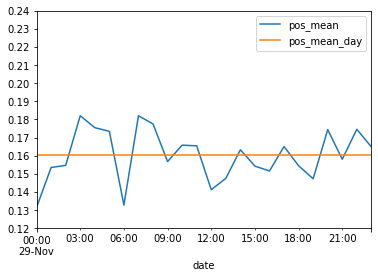

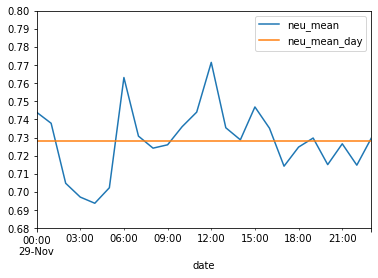

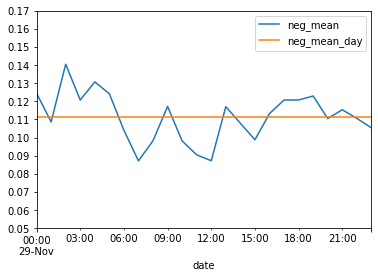

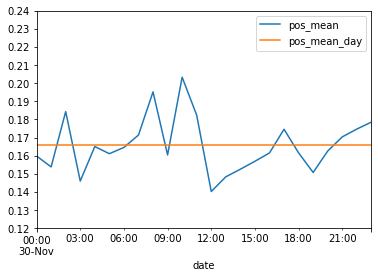

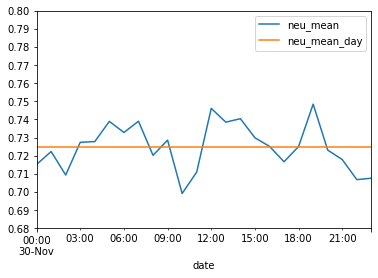

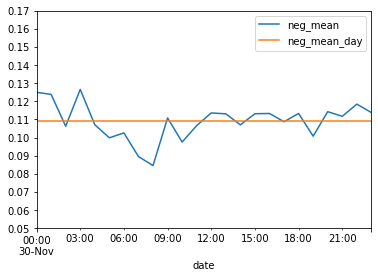

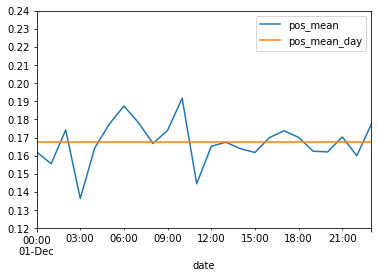

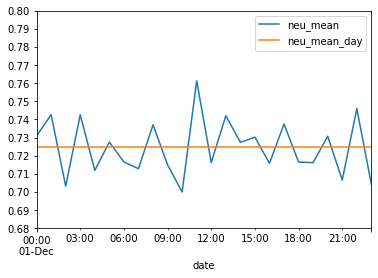

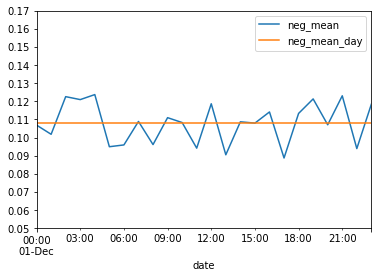

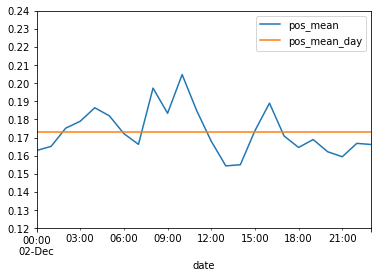

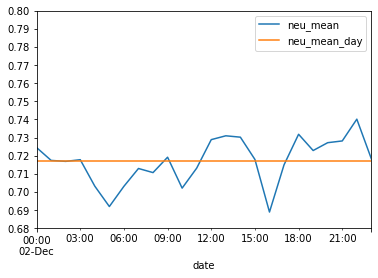

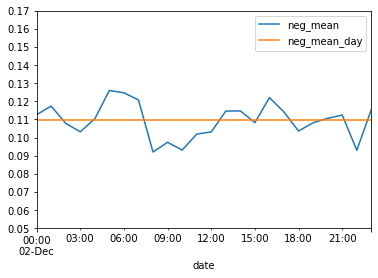

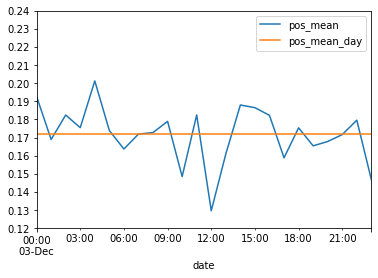

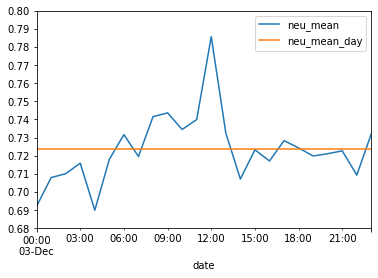

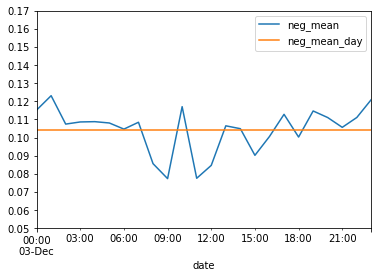

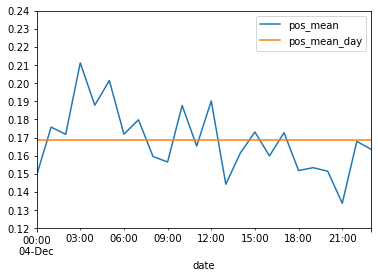

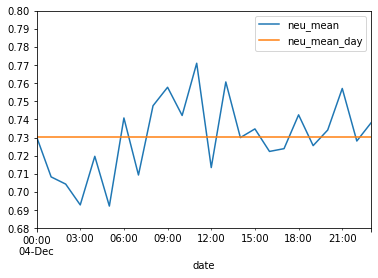

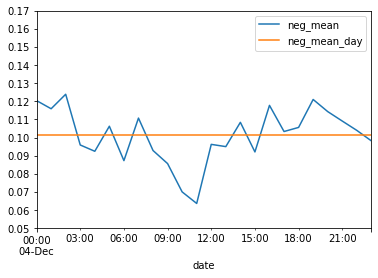

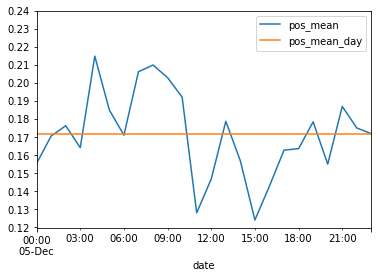

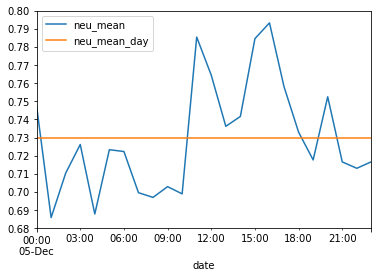

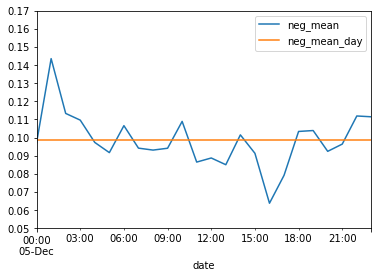

In [20]:
for csv in csvlist:
    showreg1(csv)
    showreg2(csv)
    showreg(csv)

0       1
1       1
2       1
3       1
4       1
       ..
6167    1
6168    1
6169    1
6170    1
6171    1
Name: number, Length: 6166, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
6598    1
6599    1
6600    1
6601    1
6602    1
Name: number, Length: 6602, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
6614    1
6615    1
6616    1
6617    1
6618    1
Name: number, Length: 6616, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
6768    1
6769    1
6770    1
6771    1
6772    1
Name: number, Length: 6771, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
7169    1
7170    1
7171    1
7172    1
7173    1
Name: number, Length: 7168, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
4500    1
4501    1
4502    1
4503    1
4504    1
Name: number, Length: 4503, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
4097    1
4098    1
4099    1
4100

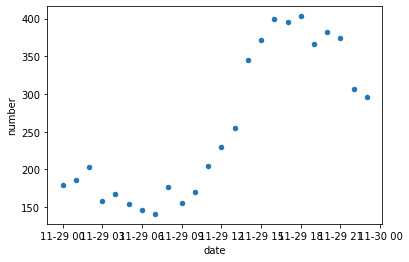

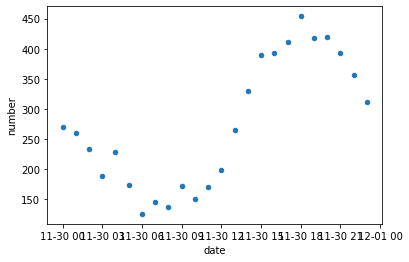

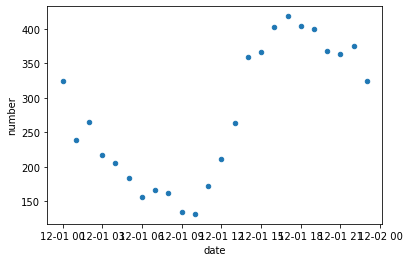

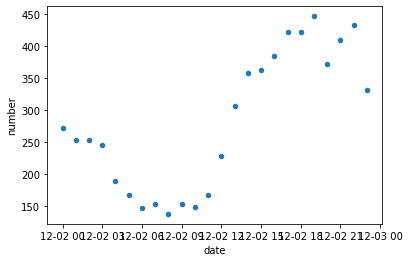

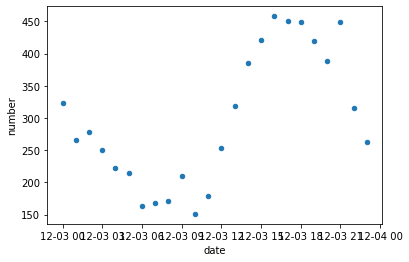

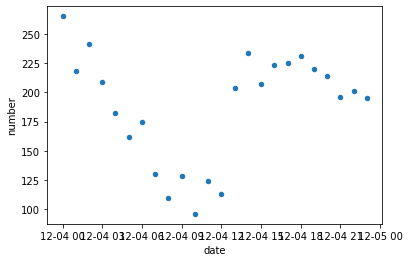

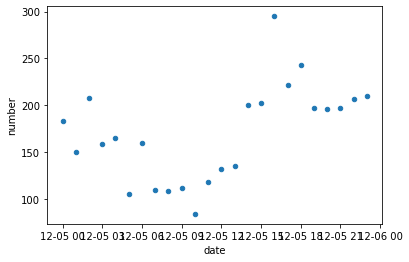

In [18]:
for csv in csvlist:
    shownum(csv)